In [1]:
#importação das bibliotecas 
import jax.numpy as jnp
import matplotlib.pyplot as plt
from math import exp, sin, cos 
from jax import jit
from jax import config
config.update("jax_enable_x64", True)



In [2]:
@jit
def f(x):
    return jnp.exp(x)*jnp.sin(x)
@jit
def g(x):
    return jnp.exp(x)*jnp.sin(x) + jnp.exp(x)*jnp.cos(x) 



In [3]:
# Calculo da Derivada Aproximada e seu Erro 
@jit
def dfp(x,h):
    return (f(x+h)-f(x))/h
@jit
def dfc(x,h):
    return (f(x+h)-f(x-h))/(2*h) 

@jit
def passo_complexo(x,h):
    return (jnp.imag(f(x + 1j*h))/h)



passos = [0.1,0.001,0.0001,1e-16] 
min = -3
max = 2.3565
vetx = jnp.linspace(min,max,500) 
vetaprxox = jnp.linspace(min,max,100)

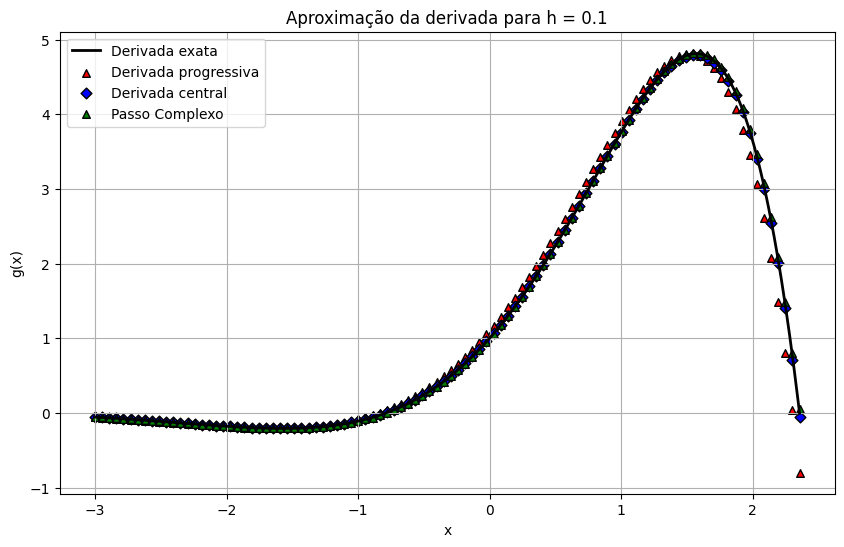

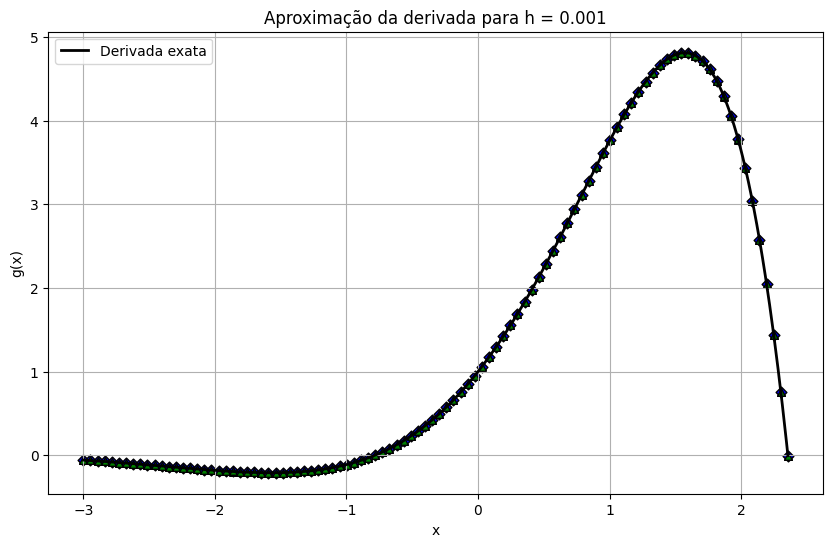

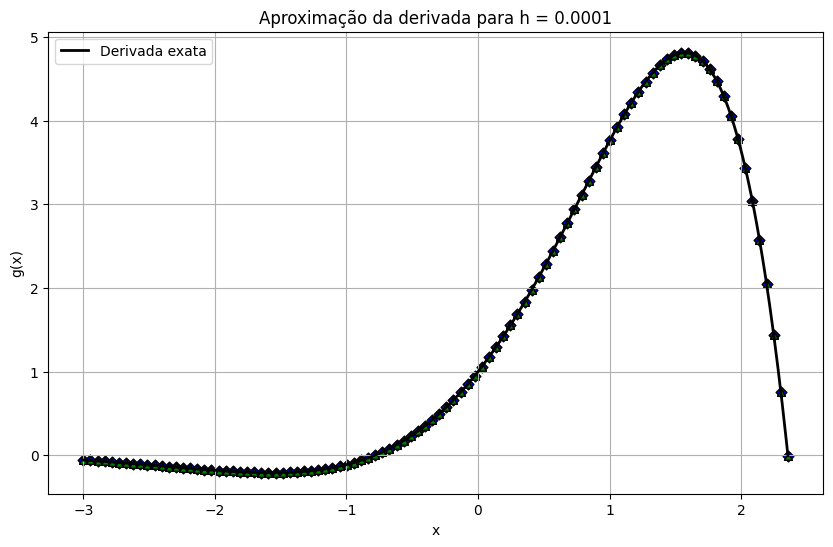

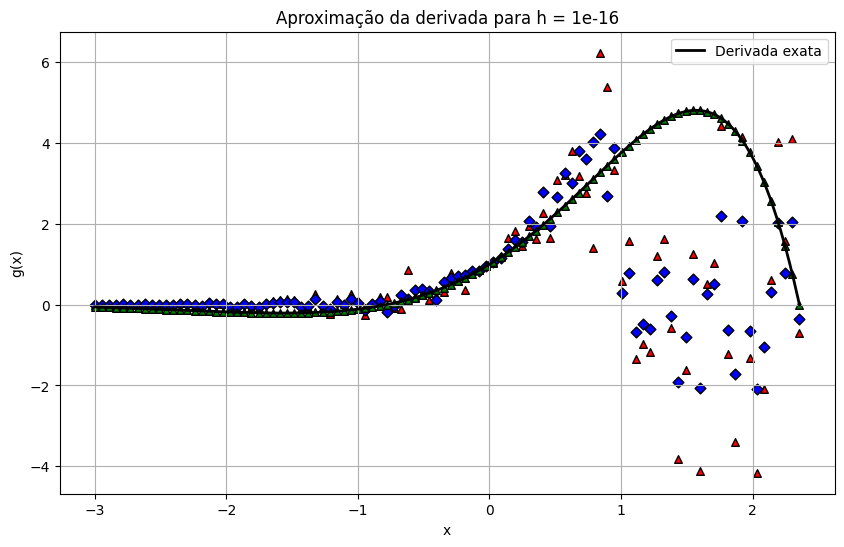

In [4]:
# Função para plotar os gráficos 
primeiro_ponto = True
for i in passos:
    plt.figure(figsize=(10,6))
    plt.plot(vetx, g(vetx) , label="Derivada exata", color="black", linewidth=2)

    dfdx_progressiva = dfp(vetaprxox,i)
    dfdx_central = dfc(vetaprxox,i)
    dfdx_complexo = passo_complexo(vetaprxox,i)
    if(primeiro_ponto):
        plt.scatter(vetaprxox , dfdx_progressiva, color='red', label="Derivada progressiva", s=30, edgecolor='black', marker = "^")
        plt.scatter(vetaprxox,dfdx_central, color='blue', label="Derivada central", s=30, edgecolor='black', marker = "D")
        plt.scatter(vetaprxox,dfdx_complexo, color = 'green' , label ="Passo Complexo" , s = 30 , edgecolor = 'black' , marker = "^")
        primeiro_ponto = False
    else:
        plt.scatter(vetaprxox , dfdx_progressiva, color='red', s=30, edgecolor='black', marker = "^")
        plt.scatter(vetaprxox,dfdx_central, color='blue', s=30, edgecolor='black', marker = "D")
        plt.scatter(vetaprxox,dfdx_complexo, color = 'green', s = 30 , edgecolor = 'black' , marker = "^")


    plt.title(f"Aproximação da derivada para h = {i}")
    plt.xlabel("x")
    plt.ylabel("g(x)")
    plt.grid(True)
    plt.legend()
    plt.show()

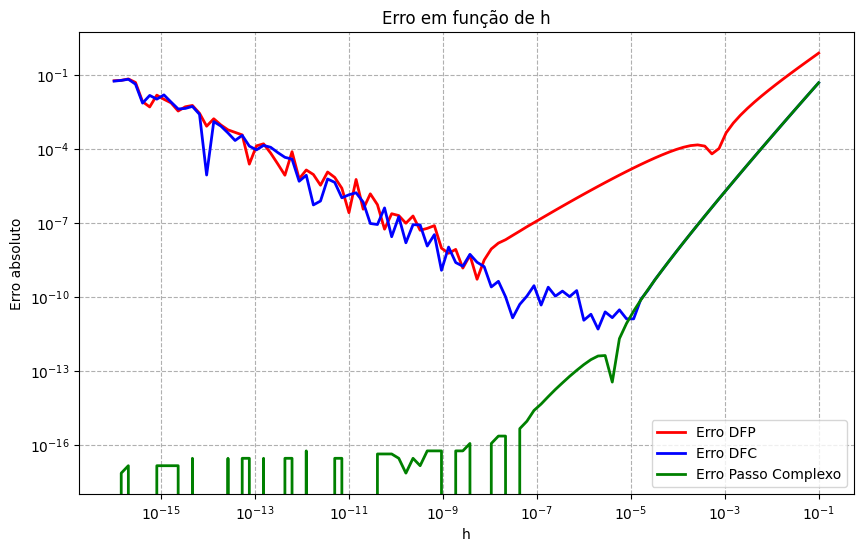

In [5]:
h = jnp.logspace(-16, -1, 100) 

erro_progressiva = jnp.abs(dfp(vetaprxox, h) - g(vetaprxox))
erro_central = jnp.abs(dfc(vetaprxox, h) - g(vetaprxox))
erro_complexo = jnp.abs(passo_complexo(vetaprxox, h) - g(vetaprxox))

plt.figure(figsize=(10, 6))
plt.loglog(h, erro_progressiva, color='red', label="Erro DFP", linewidth=2)
plt.loglog(h, erro_central, color ='blue', label="Erro DFC", linewidth=2)
plt.loglog(h, erro_complexo, color='green', label="Erro Passo Complexo", linewidth=2)

plt.title("Erro em função de h")
plt.xlabel("h")
plt.ylabel("Erro absoluto")
plt.grid(True, which="both", linestyle='--')
plt.legend()